# Challenge Deep Learning

> De a cordo com os a base de dados do site de reservas de hotel Booking.com, foi fornecido um dataset que possui 119390 de linha e 32 colunas, com base nisso foi solicitado para se utilizar alguns modelos de Machine learning e Deep learning a fim de prever se o cliente vai finalizar ou cancelar a reserva.

<hr>

<img src="https://ateondeeupuderir.com/wp-content/uploads/2019/07/como-funciona-o-booking.com_-820x394.png">

<br>
<br>

# Importando as Libs

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import tensorflow as tf
from tensorflow import keras

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from imblearn.under_sampling import NearMiss

%matplotlib inline

class color: # para formatar os prints
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Teste!' + color.END)

Teste!


# Importando o Data Set

In [2]:
df = pd.read_csv('hotel_bookings.csv', delimiter = ',')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
print(pd.isnull(df).sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(['country', 'reserved_room_type', 'assigned_room_type', 'reservation_status_date', 'company'], axis = 1, inplace = True)

In [6]:
df.dropna(axis = 0, inplace = True)

In [7]:
print(pd.isnull(df).sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64


In [8]:
# categóricas e numéricas 
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns


# dummies 
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

In [9]:
# selecionando apenas variáveis independentes
X = df.drop('is_canceled', axis=1)
# selecionando apenas a variável dependente(target)
y = df['is_canceled']


label = LabelEncoder()
y = label.fit_transform(y)



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)# serve para tornar o processo em algo reprodutivo

# vendo o shape de cada um dos x(linhas e colunas)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72133, 50), (30915, 50), (72133,), (30915,))

In [10]:
np.bincount(y)

array([62856, 40192], dtype=int64)

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
df.shape

(103048, 51)

<br>

## Modelos de Machine Learning

<br>

### SVM Classifier

<br>

In [13]:
model_svm = SVC(C = 0.5, random_state = 42)

In [14]:
model_svm.fit(X_train,y_train)

SVC(C=0.5, random_state=42)

In [15]:
y_pred_svm = model_svm.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18991
           1       1.00      1.00      1.00     11924

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915



<br>

### Random Forest Classifier

<br>

<AxesSubplot:ylabel='count'>

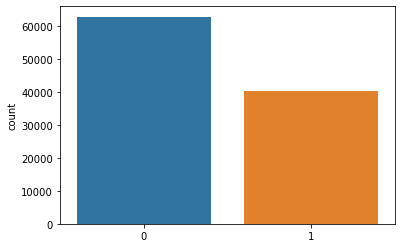

In [17]:
sns.countplot(x=y)

In [18]:
model_rf = RandomForestClassifier(random_state = 24)

In [19]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=24)

In [20]:
y_pred_rf = model_rf.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18991
           1       1.00      1.00      1.00     11924

    accuracy                           1.00     30915
   macro avg       1.00      1.00      1.00     30915
weighted avg       1.00      1.00      1.00     30915



<br>

### 2ª tentativa do Random Forest Classifier com Undersampling

<br>

In [22]:
# Undersampling
under = NearMiss()

X = df.drop('is_canceled',axis=1)
y = df['is_canceled']
X_under,y_under = under.fit_resample(X,y)

X_train_u,X_test_u, y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.3, random_state = 42) # split

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

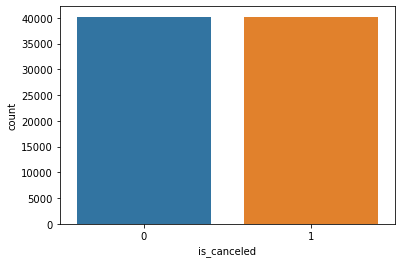

In [23]:
sns.countplot(x=y_under)

In [24]:
model_rf_2 = RandomForestClassifier(random_state = 24)
model_rf_2.fit(X_train_u,y_train_u)
y_pred_rf = model_rf_2.predict(X_test_u)
print(classification_report(y_test_u,y_pred_rf), warnings.filterwarnings("ignore"))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12059
           1       1.00      1.00      1.00     12057

    accuracy                           1.00     24116
   macro avg       1.00      1.00      1.00     24116
weighted avg       1.00      1.00      1.00     24116
 None


<br>

### 3ª tentativa do Random Forest Classifier com Oversampling

<br>

In [25]:
from imblearn.over_sampling import SMOTE

over = SMOTE(random_state=482)

X = df.drop('is_canceled',axis=1)
y = df['is_canceled']

X_over,y_over = over.fit_resample(X,y)

X_train_o,X_test_o, y_train_o,y_test_o = train_test_split(X_over,y_over,test_size=0.3,random_state=102) # split

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

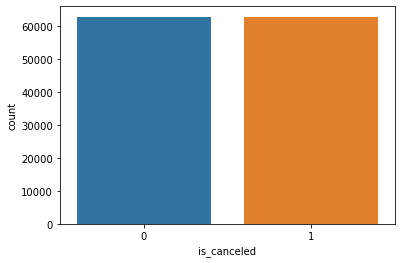

In [26]:
sns.countplot(x=y_over)

In [27]:
model_rf_3 = RandomForestClassifier(random_state = 24)
model_rf_3.fit(X_train_o,y_train_o)
y_pred_rf = model_rf_3.predict(X_test_o)
print(classification_report(y_test_o,y_pred_rf), warnings.filterwarnings("ignore"))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18826
           1       1.00      1.00      1.00     18888

    accuracy                           1.00     37714
   macro avg       1.00      1.00      1.00     37714
weighted avg       1.00      1.00      1.00     37714
 None


<br>

### Detectando as variáveis com melhor correlação com a target e aplicando o Undersampling

<br>

In [28]:
from sklearn.decomposition import PCA

# Rodar o PCA (pegar as 'x' principais colunas)
pca = PCA(n_components=10, random_state=12)

df_colunas = pca.fit_transform(X)

X_pca = pd.DataFrame(df_colunas)

In [29]:
# Undersampling
under = NearMiss()

X_under_pca,y_under_pca = under.fit_resample(X_pca,y)

X_train_u_pca,X_test_u_pca, y_train_u_pca,y_test_u_pca = train_test_split(X_under_pca,y_under_pca,test_size=0.3, random_state = 42) # split

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

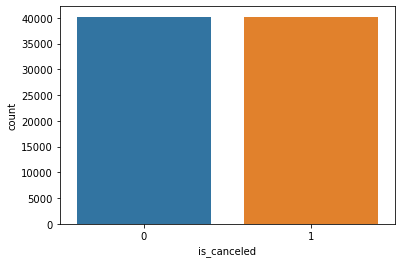

In [30]:
sns.countplot(x=y_under_pca)

In [31]:
model_rf_4 = RandomForestClassifier(random_state = 24)
model_rf_4.fit(X_train_u_pca,y_train_u_pca)
y_pred_rf = model_rf_4.predict(X_test_u_pca)
print(classification_report(y_test_u_pca,y_pred_rf), warnings.filterwarnings("ignore"))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     12059
           1       0.90      0.83      0.86     12057

    accuracy                           0.87     24116
   macro avg       0.87      0.87      0.87     24116
weighted avg       0.87      0.87      0.87     24116
 None


<br>

## Redes Neurais 

<br>

### 1ª Rede Neural - FeedForward

In [32]:
from tensorflow.keras.utils import plot_model

In [33]:
X_train.shape[1]

50

In [34]:
neural_network = tf.keras.models.Sequential([tf.keras.layers.Input(shape=X_train.shape[1]),
                                            tf.keras.layers.Dense(units=30, activation='relu'),
                                            tf.keras.layers.Dropout(0.50),
                                            tf.keras.layers.Dense(units=10),
                                            tf.keras.layers.Dense(units=1, activation='sigmoid')])

neural_network.compile(optimizer="SGD",
                      loss="binary_crossentropy",
                      metrics=['accuracy'])

In [35]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1530      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
neural_network.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2255/2255 [==============================] - 2s 808us/step - loss: 0.1850 - accuracy: 0.9278 - val_loss: 0.0046 - val_accuracy: 0.9995
Epoch 2/10
2255/2255 [==============================] - 2s 777us/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 3/10
2255/2255 [==============================] - 2s 696us/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 3.3287e-04 - val_accuracy: 1.0000
Epoch 4/10
2255/2255 [==============================] - 2s 744us/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 4.0746e-04 - val_accuracy: 0.9999
Epoch 5/10
2255/2255 [==============================] - 2s 707us/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 2.4751e-04 - val_accuracy: 1.0000
Epoch 6/10
2255/2255 [==============================] - 2s 740us/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 3.2297e-04 - val_accuracy: 0.9999
Epoch 7/10
2255/2255 [==============================] - 2s 834us/step - loss: 0.0058 - accuracy: 0.9982 - va

In [37]:
y_pred = neural_network.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_test.shape, y_pred.shape

((30915,), (30915,))

In [39]:
print(classification_report(y_test, y_pred), warnings.filterwarnings("ignore"))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     18991
           1       0.00      0.00      0.00     11924

    accuracy                           0.61     30915
   macro avg       0.31      0.50      0.38     30915
weighted avg       0.38      0.61      0.47     30915
 None


<br>

### Rede Neural FeedForward, com PCA e Undersampling para suavisar o Overfiting

<br>

In [40]:
neural_network = tf.keras.models.Sequential([tf.keras.layers.Input(shape=X_train_u_pca.shape[1]),
                                            tf.keras.layers.Dense(units=30, activation='relu'),
                                            tf.keras.layers.Dropout(0.10),
                                            tf.keras.layers.Dense(units=10),
                                            tf.keras.layers.Dense(units=1, activation='sigmoid')])

neural_network.compile(optimizer="SGD",
                      loss="binary_crossentropy",
                      metrics=['accuracy'])

In [41]:
neural_network.fit(X_train_u_pca, y_train_u_pca, epochs=10, batch_size=32, validation_data=(X_test_u_pca, y_test_u_pca))

Epoch 1/10
1759/1759 [==============================] - 2s 875us/step - loss: 0.7247 - accuracy: 0.6262 - val_loss: 0.6255 - val_accuracy: 0.6445
Epoch 2/10
1759/1759 [==============================] - 1s 815us/step - loss: 0.6302 - accuracy: 0.6413 - val_loss: 0.6167 - val_accuracy: 0.6484
Epoch 3/10
1759/1759 [==============================] - 1s 741us/step - loss: 0.6196 - accuracy: 0.6543 - val_loss: 0.6053 - val_accuracy: 0.6708
Epoch 4/10
1759/1759 [==============================] - 1s 763us/step - loss: 0.6125 - accuracy: 0.6608 - val_loss: 0.6115 - val_accuracy: 0.6710
Epoch 5/10
1759/1759 [==============================] - 1s 708us/step - loss: 0.6081 - accuracy: 0.6654 - val_loss: 0.5979 - val_accuracy: 0.6674
Epoch 6/10
1759/1759 [==============================] - 1s 716us/step - loss: 0.6039 - accuracy: 0.6700 - val_loss: 0.6024 - val_accuracy: 0.6725
Epoch 7/10
1759/1759 [==============================] - 1s 727us/step - loss: 0.6006 - accuracy: 0.6764 - val_loss: 0.6046 -

In [42]:
y_pred = neural_network.predict(X_test_u_pca)
y_pred = np.argmax(y_pred, axis=1)

In [43]:
y_test_u_pca.shape, y_pred.shape

((24116,), (24116,))

In [44]:
print(classification_report(y_test_u_pca, y_pred), warnings.filterwarnings("ignore"))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12059
           1       0.00      0.00      0.00     12057

    accuracy                           0.50     24116
   macro avg       0.25      0.50      0.33     24116
weighted avg       0.25      0.50      0.33     24116
 None


<br>

### 2ª Rede Neural MLP Classifier com Undersampling

<br>

In [45]:
# Undersampling
under = NearMiss()

X = df.drop('is_canceled',axis=1)
y = df['is_canceled']
X_under,y_under = under.fit_resample(X,y)

X_train_u,X_test_u, y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.3, random_state = 42) # split

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_california_housing

model_mlp = MLPClassifier(hidden_layer_sizes= (64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train_u,y_train_u)

y_pred_mpl = model_mlp.predict(X_test_u)

print("\nA pontuação foi de: ",(r2_score(list(y_test_u), list(y_pred_mpl))))
print(classification_report(y_test_u, y_pred_mpl))

#plt.figure(figsize = (10,6))
#sns.scatterplot(y_test_u,y_pred_mpl)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')


A pontuação foi de:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12059
           1       1.00      1.00      1.00     12057

    accuracy                           1.00     24116
   macro avg       1.00      1.00      1.00     24116
weighted avg       1.00      1.00      1.00     24116



<br>

### Rede Neural MLP Classifier, com PCA e Undersampling para suavisar o Overfiting

### Melhor Modelo

<br>

In [47]:
model_mlp_2 = MLPClassifier(hidden_layer_sizes= (64,64,64), activation="relu", random_state=1, max_iter=2000).fit(X_train_u_pca,y_train_u_pca)

y_pred_mpl = model_mlp_2.predict(X_test_u_pca)

print("\nA pontuação foi do R2 foi de: ",(round(r2_score(list(y_test_u_pca), list(y_pred_mpl)),2)))
print('\n')
print(classification_report(y_test_u, y_pred_mpl))


A pontuação foi do R2 foi de:  0.73


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     12059
           1       0.93      0.94      0.93     12057

    accuracy                           0.93     24116
   macro avg       0.93      0.93      0.93     24116
weighted avg       0.93      0.93      0.93     24116



<br>

### Auto Keras 

<br>

In [48]:
!pip install autokeras

In [49]:
import autokeras as ak

In [50]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=6)

model_auto = ak.StructuredDataClassifier(max_trials = 4, overwrite=False, seed=5) 
# Colocariamos mais Max Trials, porém o modelo não foi bem

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json


In [51]:
type(X_train), type(X_train_u_pca)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [52]:
model_auto.fit(X,y, epochs=15, callbacks = [callback])

INFO:tensorflow:Oracle triggered exit
Epoch 1/15
3221/3221 [==============================] - 6s 2ms/step - loss: 0.0400 - accuracy: 0.9844
Epoch 2/15
3221/3221 [==============================] - 5s 1ms/step - loss: 7.5820e-04 - accuracy: 0.9999: 0s - loss: 7.8422e-04 - accuracy:  - ETA: 0s - loss: 7.5849e-04 - accuracy: 0.99
Epoch 3/15
3221/3221 [==============================] - 5s 2ms/step - loss: 5.1564e-04 - accuracy: 0.9999
Epoch 4/15
3221/3221 [==============================] - 5s 1ms/step - loss: 4.3333e-04 - accuracy: 0.9999: 
Epoch 5/15
3221/3221 [==============================] - 5s 1ms/step - loss: 1.5394e-05 - accuracy: 1.0000: 1s - ETA: 0s - loss: 1.5939e-05 - accuracy
Epoch 6/15
3221/3221 [==============================] - 5s 1ms/step - loss: 6.1011e-05 - accuracy: 1.0000: 4s - loss: 3.4853e-0 - ETA: 3s - loss: 3.0450e-0 - ETA - ETA: 2s - loss: 1.1212e-04 - ac - ETA: 1s - loss: 9.8090e-05  - ETA: 1s - loss: 8.4870e-05 - accura - ETA: 1s - loss: 7.8928e-05 -  - ETA: 0s - 